![](https://i.imgur.com/0AUxkXt.png)

# Assignment 3 - From data to insights

Before you explore the data, write down a short list of what you expect to see in the data: the distribution of key variables, the relationships between important pairs of them, and so on. Such a list is essentially a prediction based on your current understanding of the business.

Now analyze the data. Make plots, do summaries, whatever is needed to see if it matches your expectations.

Is there anything that doesn’t match? Anything that makes you go “That’s odd” or “That doesn’t make any sense.”?

Zoom in and try to understand what in your business is making that weird thing show up in the data like that. This is the critical step.

You may have just found an insight into the business and increased your understanding


## The data analysis checklist

This checklist can be used as a guide during the process of a data analysis, or as a way to evaluate the quality of a reported data analysis.

### Answering the first questions

1. Did you define the metric for success before beginning?
2. Did you understand the context for the question and business application?
3. Did you consider whether the question could be answered with the available data?

### Cleaning the data

1. Did you identify the missing data?
2. Is each variable one column?
3. Do different data types appear in each table?
4. Did you try to identify any errors or miscoding of variables?
5. Did you check for outliers?

### Exploratory analysis

1. Did you make univariate plots (histogram, distplot, boxplot)?
2. Did you consider correlations between variables (scatterplot, jointplot, kde plot, correlation matrix)?
3. Did you check the units of all data points to make sure they are in the right range?

### Presentations

1. Did you lead with a brief, understandable to everyone of your problem?
2. Did you explain the data, describe the question of interest?
3. Did you make sure all legends and axes were legible from the back of the room?

## Dataset - Online Retailes Purchase

Typically e-commerce datasets are proprietary and consequently hard to find among publicly available data. However, [The UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php) has made this dataset containing actual transactions from 2010 and 2011. The dataset is maintained on their site, where it can be found by the title "Online Retail".


### Step 1 - Checking the data

**Import tools set**

In [3]:
# Your code here
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

**Import data**

In [4]:
# link = "https://ml101-khanhnguyen.s3-ap-southeast-1.amazonaws.com/devc/Online_Retail.csv"
# Note: set param encoding = 'latin1'
# Your code here
sal = pd.read_csv("Online_Retail.csv",encoding='latin1')


In [5]:
# Print out First 5 rows from dataframe
# Your code here
sal.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [6]:
# Print out brief info
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 22.7+ MB


### Step 2 - Cleaning the data

Few of useful data cleaning functions:

* `s.astype('category')` # This will convert the datatype of the series to float *Please note that "s" here is a Pandas Series

* `s.replace(1,'one')` # This will replace all values equal to 1 with 'one'

* `s.replace([1,3],['one','three'])` # This will replace all 1 with 'one' and 3 with 'three'

* `data.rename(columns=lambda x: x + 1)` # Mass renaming of columns

* `data.rename(columns={'oldname': 'new name'})` # Selective renaming

* `data.set_index('column_one')` #  This will change the index

* `data.rename(index=lambda x: x + 1)` # Mass renaming of index

* `data.dropna()` # Remove missing values

* `data.fillna(x)` #  This will replaces all null values with x

* `s.fillna(s.mean())` # This will replace all null values with the mean (mean can be replaced with almost any function from the below section) :

* `data.corr()` # This will return the correlation between columns in a DataFrame

* `data.count()` # This will return the number of non-null values in each DataFrame column

* `data.max()` # This will return the highest value in each column

* `data.min()` # This will return the lowest value in each column

* `data.median()` # This will return the median of each column

* `data.std()` # This will returns the standard deviation of each column


**Check for NaN values**

In [7]:
# Your code here
#Lấy những giá trị rộng trong từng bảng
sal.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

**Examine few examples of NaN values**

In [20]:
# List all NaN values
sal[sal==sal.isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,Total
0,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
541904,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
541905,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
541906,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
541907,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN


**Exclude negative Quatity entries**

In [9]:
sal[(sal['Quantity']<0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/10 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/10 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/10 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/10 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/10 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/11 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/11 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/11 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/11 11:58,1.25,17315.0,United Kingdom


**Exclude negative Price entries**

In [10]:
sal[(sal['UnitPrice']<0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,8/12/11 14:51,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,8/12/11 14:52,-11062.06,NaN,United Kingdom


### Step 3 - EDA

**The customer with the highest number of orders comes from the United Kingdom (UK)**

**The customer with the highest money spent on purchases comes from Netherlands**

In [11]:
# Your code here
getCountry= sal[sal['Country']=="United Kingdom"].groupby(['CustomerID','InvoiceNo']).sum().reset_index()
#getCountry
getUKUser= getCountry['CustomerID'].value_counts().index[0]
getUKUser

12748.0

In [12]:
# Your code here
getCountry= sal[sal['Country']=="Netherlands"].groupby('CustomerID').sum().reset_index()
getCountry['Total'] = getCountry['Quantity']*getCountry['UnitPrice']
showUser=getCountry[getCountry['Total']==getCountry['Total'].max()]
showUser.CustomerID

8    14646.0
Name: CustomerID, dtype: float64

**On which year had the highest sales?**

In [13]:
# Your code here
getYear= sal
getYear['InvoiceDate'] = pd.to_datetime(getYear['InvoiceDate'])

getYear['year'] = getYear['InvoiceDate'].dt.year
getYear['Total'] = getYear['Quantity']*getYear['UnitPrice']
getValue= sal.groupby('year').sum().reset_index()
getHighestYear=getValue[getValue['Total']==getValue['Total'].max()]
getHighestYear['year']

1    2011
Name: year, dtype: int64

**How many orders (per hour)?**

In [31]:
#gán getHour bằng sal
getHour= sal
getHour['InvoiceDate'] = pd.to_datetime(getHour['InvoiceDate'])
#Lấy ra thời gian trong getHour
getHour['hour'] = getHour['InvoiceDate'].dt.hour
#Lấy ra số lượng giờ theo date
getAllHour= getHour.groupby(['hour','InvoiceDate']).sum().reset_index()
getHoura= getAllHour['hour'].value_counts()
#Hiển thị số lượng giờ
getHoura

12    3501
13    3003
11    2839
14    2787
15    2711
10    2668
16    1781
9     1662
17    1113
8      598
18     306
19     211
7       31
20      28
6       21
Name: hour, dtype: int64

**Make a plot about number of orders per hour**

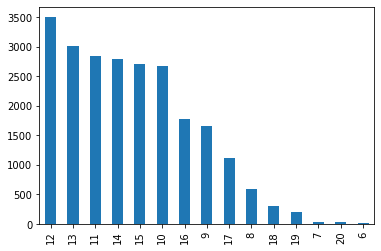

In [32]:
#Hiển thị số hóa đơn trên một đơn vị giờ
getHoura.plot(kind="bar")

**How many orders (per month)?**

In [42]:
#gán getMonth bằng sal
getMonth= sal
getMonth['InvoiceDate'] = pd.to_datetime(getMonth['InvoiceDate'])
#Lấy ra thời gian trong getMonth
getMonth['month'] = getMonth['InvoiceDate'].dt.month
#Lấy ra số lượng tháng theo date
getAllMonth= getMonth.groupby(['month','InvoiceDate','year']).sum().reset_index()
getMontha= getAllMonth['month'].value_counts()
#Hiển thị số lượng order trong tháng
getMontha

11    3029
12    2669
10    2358
9     2097
5     1931
6     1825
3     1808
7     1735
8     1608
4     1540
1     1349
2     1311
Name: month, dtype: int64

**Make a plot about number of orders per month**

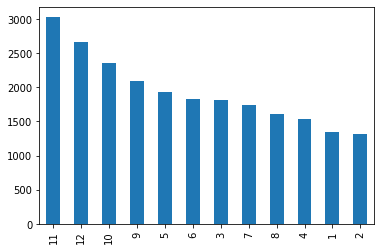

In [43]:
#Hiển thị số hóa đơn trên một đơn vị tháng
getMontha.plot(kind="bar")

**Top 10 items most sales**

In [56]:
#Đếm tất cả giá tri stockcode hiện có
getItems=sal['StockCode'].value_counts()
#Hiển thị 10 sản phâm đầu tiên
getItems.head(10)

85123A    2313
22423     2203
85099B    2159
47566     1727
20725     1639
84879     1502
22720     1477
22197     1476
21212     1385
20727     1350
Name: StockCode, dtype: int64

**Create a histogram with the 10 countries that have the most 'Quantity' ordered except UK**

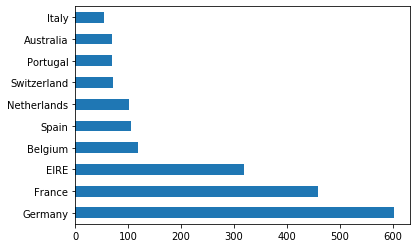

In [60]:
# Your code here
#Lấy ra các quốc gia không là UK
getCountry1= sal[sal['Country']!="United Kingdom"].groupby(['CustomerID','InvoiceNo','Country']).sum().reset_index()
#getCountry
getNonUKUser= getCountry1['Country'].value_counts().head(10)
getNonUKUser
# What can you tell about this?
getNonUKUser.plot(kind="barh")

### You are awesome!!